In [28]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob
plt.style.use('fivethirtyeight')

In [3]:
data =pd.read_csv("Customer Satisfaction Questionnaire   (Responses) - Form responses 1.csv")
data.head(10)

,Timestamp,NetworkService,Country of Origin,Gender,Age range,How long have you been using your current network provider,Have you tried any Network asides the one you are currently on,What are the three good things about your current Network,What are the three bad things about your current Network,"Would you recommend your current network to family, friends, colleagues.",Churn
0,21/06/2022 13:12,EE,India,Male,25-30,0 -6,Yes,"Connectivity, network strength, internet","Cost , sometimes singal goes off",Yes,No
1,21/06/2022 13:18,Giffgaff,Nigeria,Male,30-45,7,No,Cheap bundles,Network signal not everywhere,Yes,No
2,21/06/2022 13:20,EE,Uk,Male,25-30,24,No,Easy to contact support. Easy to use app. Fair...,Lack of signal sometimes.,Yes,No
3,21/06/2022 13:22,EE,Nigeria,Male,30-45,7,No,Gifting data to family,"High priced contracts, not enough network cove...",No,Yes
4,21/06/2022 13:24,Giffgaff,Nigeria,Male,30-45,12,No,"Affordable price, easy connections, Good app i...",None,Yes,No
5,21/06/2022 13:24,Giffgaff,Nigeria,Male,30-45,12,No,Reliable,No 5g,Yes,No
6,21/06/2022 13:27,Lebara,Nigeria,Female,30-45,7,Yes,"Bonuses, WiFi availability, cost",International bundle cost,Yes,No
7,21/06/2022 13:29,"Lebara, Telco",Nigeria,Male,30-45,7,No,"Cheap subscription, network speed and network...","Network stability, distance to recharge, broad...",Yes,Yes
8,21/06/2022 13:32,Giffgaff,France,Male,25-30,12,No,Constant internet\r\naffordable \r\nEasy acces...,None,Yes,Yes
9,21/06/2022 13:34,Telco,Nigeria,Male,45 and above,24,No,"I got better deal, good customer satisfaction",Poor service in some area,Yes,No


In [4]:
data.describe()

,Timestamp,NetworkService,Country of Origin,Gender,Age range,How long have you been using your current network provider,Have you tried any Network asides the one you are currently on,What are the three good things about your current Network,What are the three bad things about your current Network,"Would you recommend your current network to family, friends, colleagues.",Churn
count,120,120,120,120,120,120,120,120,120,120,120
unique,115,30,23,2,6,8,2,120,104,2,2
top,21/06/2022 14:14,EE,Nigeria,Female,30-45,24,No,"Connectivity, network strength, internet",None,Yes,No
freq,2,23,52,64,65,45,73,1,10,103,87


In [5]:
data.shape


(120, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Timestamp                                                                 120 non-null    object
 1   NetworkService                                                            120 non-null    object
 2   Country of Origin                                                         120 non-null    object
 3   Gender                                                                    120 non-null    object
 4   Age range                                                                 120 non-null    object
 5   How long have you been using your current network provider                120 non-null    object
 6   Have you tried any Network asides the one you are currently on            

In [7]:
data

,Timestamp,NetworkService,Country of Origin,Gender,Age range,How long have you been using your current network provider,Have you tried any Network asides the one you are currently on,What are the three good things about your current Network,What are the three bad things about your current Network,"Would you recommend your current network to family, friends, colleagues.",Churn
0,21/06/2022 13:12,EE,India,Male,25-30,0 -6,Yes,"Connectivity, network strength, internet","Cost , sometimes singal goes off",Yes,No
1,21/06/2022 13:18,Giffgaff,Nigeria,Male,30-45,7,No,Cheap bundles,Network signal not everywhere,Yes,No
2,21/06/2022 13:20,EE,Uk,Male,25-30,24,No,Easy to contact support. Easy to use app. Fair...,Lack of signal sometimes.,Yes,No
3,21/06/2022 13:22,EE,Nigeria,Male,30-45,7,No,Gifting data to family,"High priced contracts, not enough network cove...",No,Yes
4,21/06/2022 13:24,Giffgaff,Nigeria,Male,30-45,12,No,"Affordable price, easy connections, Good app i...",None,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
115,27/06/2022 17:56,3network,Ghana,Female,45 and above,24,Yes,"Good reception, no network problems.",Nothing that I'm aware of currently.,Yes,No
116,30/06/2022 13:15,Vodafone,Nigeria,Female,45 and above,24,Yes,Good Internet connection abroad\r\nGood custom...,A bit more expensive,Yes,No
117,01/07/2022 19:24,"EE, 02",United Kingdom,Female,25-30,7,Yes,Sufficient call minutes,Horrible data bundle,No,Yes
118,10/07/2022 14:29,EE,Ghana,Female,45 and above,24,No,Reliable. Good customer service,"Long wait when you call,",Yes,No


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [10]:
data.isnull().sum()

Timestamp                                                                   0
NetworkService                                                              0
Country of Origin                                                           0
Gender                                                                      0
Age range                                                                   0
How long have you been using your current network provider                  0
Have you tried any Network asides the one you are currently on              0
What are the three good things about your current Network                   0
What are the three bad things about your current Network                    0
Would you recommend your current network to family, friends, colleagues.    0
Churn                                                                       0
dtype: int64

In [31]:
updated_data= pd.read_csv("Reviews Sentiment.csv")
updated_data

,Id,NetworkService,Reviews
0,1,EE,"Connectivity, network strength, internet"
1,2,Giffgaff,Cheap bundles
2,3,EE,Easy to contact support. Easy to use app. Fair...
3,4,EE,Gifting data to family
4,5,EE,"Cost , sometimes singal goes off"
...,...,...,...
100,101,3network,Nothing that I'm aware of currently.
101,102,Vodafone,A bit more expensive
102,103,EE,Horrible data bundle
103,104,EE,"Long wait when you call,"


In [34]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#tells how positive or negative the review is
def getpolarity(text):
    return TextBlob(text). sentiment.polarity

updated_data['Subjectivity']= updated_data['Reviews'].apply(getSubjectivity)

updated_data['Polarity']= updated_data['Reviews'].apply(getpolarity)
updated_data

,Id,NetworkService,Reviews,Subjectivity,Polarity
0,1,EE,"Connectivity, network strength, internet",0.000000,0.000000
1,2,Giffgaff,Cheap bundles,0.700000,0.400000
2,3,EE,Easy to contact support. Easy to use app. Fair...,0.855556,0.522222
3,4,EE,Gifting data to family,0.000000,0.000000
4,5,EE,"Cost , sometimes singal goes off",0.000000,0.000000
...,...,...,...,...,...
100,101,3network,Nothing that I'm aware of currently.,0.325000,0.125000
101,102,Vodafone,A bit more expensive,0.600000,0.000000
102,103,EE,Horrible data bundle,1.000000,-1.000000
103,104,EE,"Long wait when you call,",0.400000,-0.050000


In [36]:
#creating a function to compute the negative , positive and neutral string.

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

updated_data['Analysis'] = updated_data['Polarity'].apply(getAnalysis)
#showing the dataframe
updated_data

,Id,NetworkService,Reviews,Subjectivity,Polarity,Analysis
0,1,EE,"Connectivity, network strength, internet",0.000000,0.000000,Neutral
1,2,Giffgaff,Cheap bundles,0.700000,0.400000,Positive
2,3,EE,Easy to contact support. Easy to use app. Fair...,0.855556,0.522222,Positive
3,4,EE,Gifting data to family,0.000000,0.000000,Neutral
4,5,EE,"Cost , sometimes singal goes off",0.000000,0.000000,Neutral
...,...,...,...,...,...,...
100,101,3network,Nothing that I'm aware of currently.,0.325000,0.125000,Positive
101,102,Vodafone,A bit more expensive,0.600000,0.000000,Neutral
102,103,EE,Horrible data bundle,1.000000,-1.000000,Negative
103,104,EE,"Long wait when you call,",0.400000,-0.050000,Negative


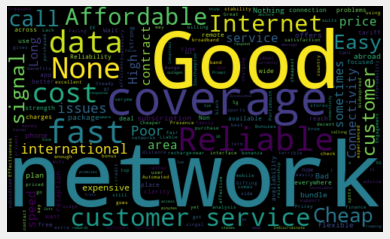

In [39]:
#seeing how well the sentiment are distributed
words= ' '.join( [reviews for reviews in updated_data['Reviews']])
word_cloud = WordCloud(width = 500, height=300, random_state =21, max_font_size= 119).generate(words)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [35]:
#visualisation to display highest network that customers are likely going to leave
fig = px.histogram(data, x= "Churn", color= "NetworkService", barmode="group", title="Churn and Internet services")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(data, x="Gender", color="Age range", barmode="group", title='Gender and Churn relationship')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(data, x="Churn", color="How long have you been using your current network provider", barmode="group", title="Customer contract distribution")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [14]:
#seeing the relationship of how long respondent have been usong their network provide
fig = px.box(data, x= 'Churn', y= 'How long have you been using your current network provider')
figsize=(15,15)
fig.show()

In [37]:
fig = px.histogram(updated_data, x= "Analysis", color= "NetworkService", barmode="group", title="Churn and Internet services")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [38]:
fig = px.histogram(updated_data, x= "NetworkService", color= "Analysis", barmode="group", title="Top 5 Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

TOP FIVE NETWORK

In [41]:
#Top 5 with the highest positive review

top_Network = updated_data[['NetworkService', 'Subjectivity']]
top_Network = top_Network.groupby(['NetworkService']).sum()
top_5_Network = top_Network.sort_values(by = ['Subjectivity'], ascending =False).head()
top_5_Network

,Subjectivity
NetworkService,
EE,9.191389
Giffgaff,7.225833
Vodafone,5.162222
Lebara,4.790000
3network,4.016667


EXTRACTING TOP 5 NETWORK

EE NETWORK

In [44]:
Network_Service= ['EE']
EE_network = updated_data[updated_data.NetworkService.isin(Network_Service)]

EE_network


fig = px.histogram(EE_network, x= "Analysis", color= "Analysis", barmode="group", title="EE_Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

GIFFGAFF

In [45]:
Network_Service = ["Giffgaff"]
Giffgaff_Network= updated_data[updated_data.NetworkService.isin(Network_Service)]

Giffgaff_Network

fig = px.histogram(Giffgaff_Network, x= "Analysis", color= "Analysis", barmode="group", title="Giffgaff_Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

VODAFONE NETWORK

In [47]:
Network_Service = ["Vodafone"]
Vodafone_Network= updated_data[updated_data.NetworkService.isin(Network_Service)]

Vodafone_Network

fig = px.histogram(Vodafone_Network, x= "Analysis", color= "Analysis", barmode="group", title="Vodafone_Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

LEBARA NETWORK

In [49]:
lebara_Service = ["Lebara"]
Lebara_Network = updated_data[updated_data.NetworkService.isin(Network_Service)]

Lebara_Network
fig = px.histogram(Lebara_Network, x="Analysis", color="Analysis", barmode="group", title="Lebara_Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

3 NETWORK

In [50]:
Network_Service = ['3network']
three_network = updated_data[updated_data.NetworkService.isin(Network_Service)]

three_network
fig = px.histogram(three_network, x="Analysis", color="Analysis", barmode="group", title="Vodafone_Network")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()